In [10]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency,chi2,f_oneway,t

In [11]:
tienda = pd.read_csv(r"C:\Users\Abdon.RAMIREZ-BRICEN\OneDrive - Akkodis\Desktop\Analisis_datos_eda\data\processed\Merch_processed.csv")

In [12]:
df = tienda.copy()

In [42]:
plt.style.use('ggplot')

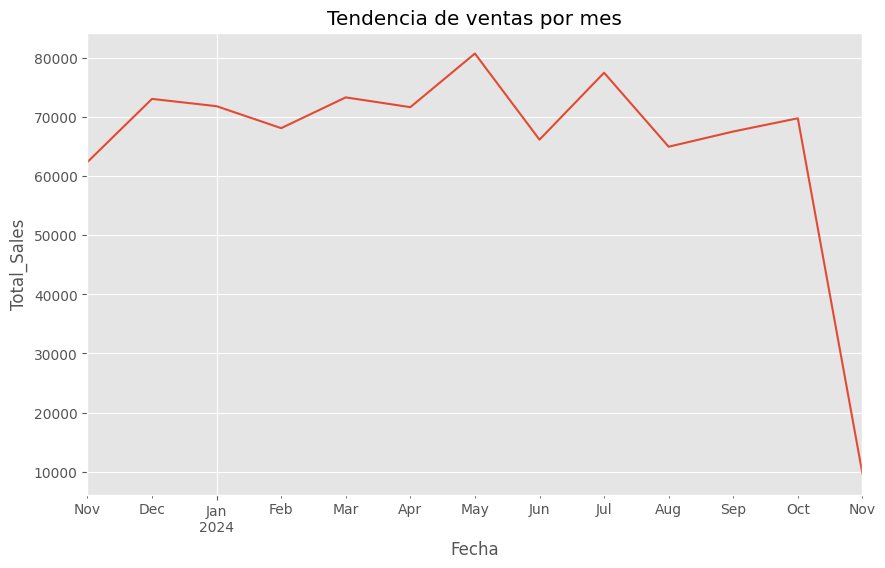

In [43]:
plt.figure(figsize=(10, 6))
df.set_index('Order_Date').resample('ME')['Total_Sales'].sum().plot()
plt.title('Tendencia de ventas por mes')
plt.xlabel('Fecha')
plt.ylabel('Total_Sales')
plt.show();

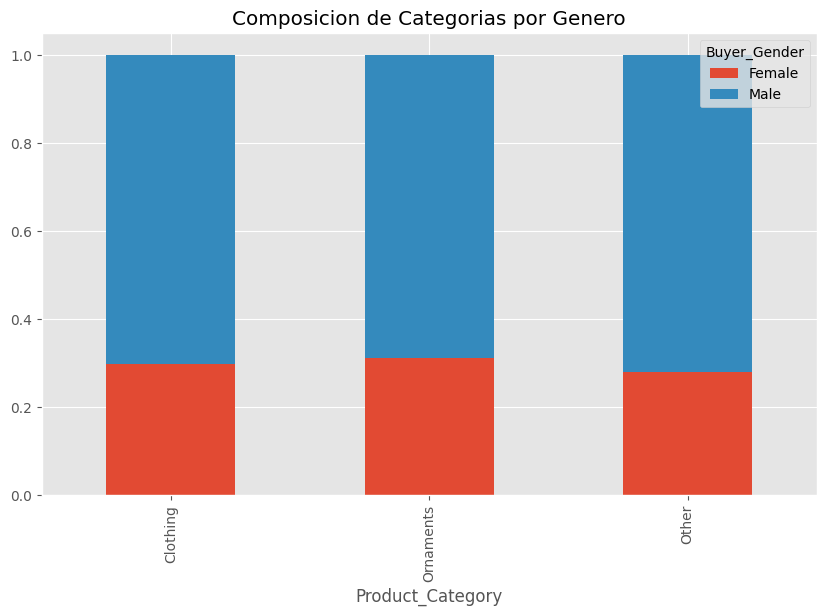

In [44]:
pd.crosstab(df['Product_Category'], df['Buyer_Gender'], normalize='index').plot(
    kind='bar', stacked=True, figsize=(10, 6))
plt.title("Composicion de Categorias por Genero")
plt.show()

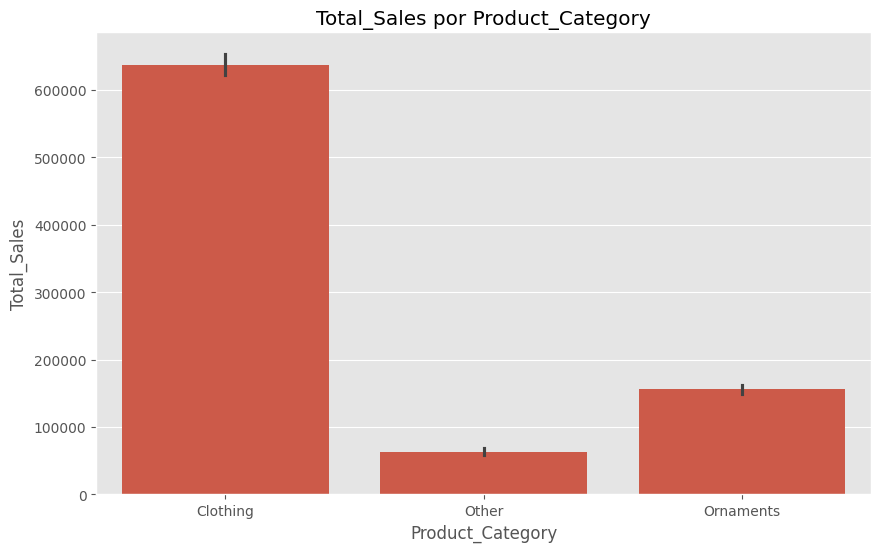

In [45]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Product_Category', y='Total_Sales', data=df, estimator=sum)
plt.title('Total_Sales por Product_Category')
plt.show()

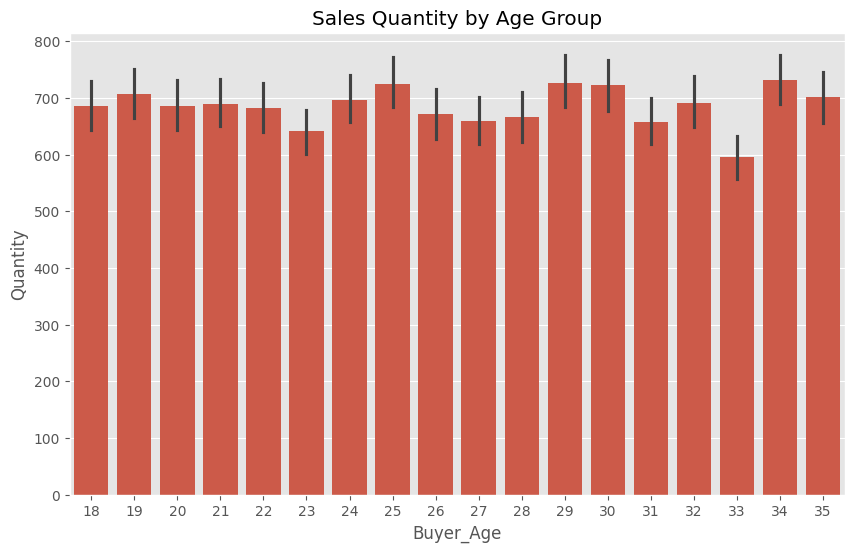

In [46]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Buyer_Age', y='Quantity', data=df, estimator=sum)
plt.title('Sales Quantity by Age Group')
plt.show()

In [47]:
df

,Unnamed: 0,Order_ID,Order_Date,Product_ID,Product_Category,Buyer_Gender,Buyer_Age,Order_Location,International_Shipping,Sales_Price,Shipping_Charges,Sales_per_Unit,Quantity,Total_Sales,Rating
0,0,189440,2024-07-21,BF1543,Clothing,Male,30,New Jersey,No,100,0,100,1,100,4
1,1,187385,2024-07-20,BF1543,Clothing,Male,32,Las Vegas,No,100,0,100,1,100,3
2,2,181844,2024-07-21,BF1544,Other,Female,26,Cardiff,Yes,9,40,49,1,49,2
3,3,197934,2024-08-19,BF1544,Other,Male,28,Pittsburgh,No,9,0,9,2,18,3
4,4,122470,2024-01-06,BF1545,Other,Female,19,Miami,No,10,0,10,3,30,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7389,7389,136943,2023-12-10,BF1548,Clothing,Male,23,Las Vegas,No,65,0,65,1,65,4
7390,7390,172276,2024-01-24,BF1546,Clothing,Female,26,Manchester,Yes,118,40,158,1,158,4
7391,7391,160191,2023-12-19,BF1552,Ornaments,Male,19,Miami,No,45,0,45,1,45,2
7392,7392,195268,2023-12-07,BF1555,Other,Male,34,Miami,No,23,0,23,1,23,5


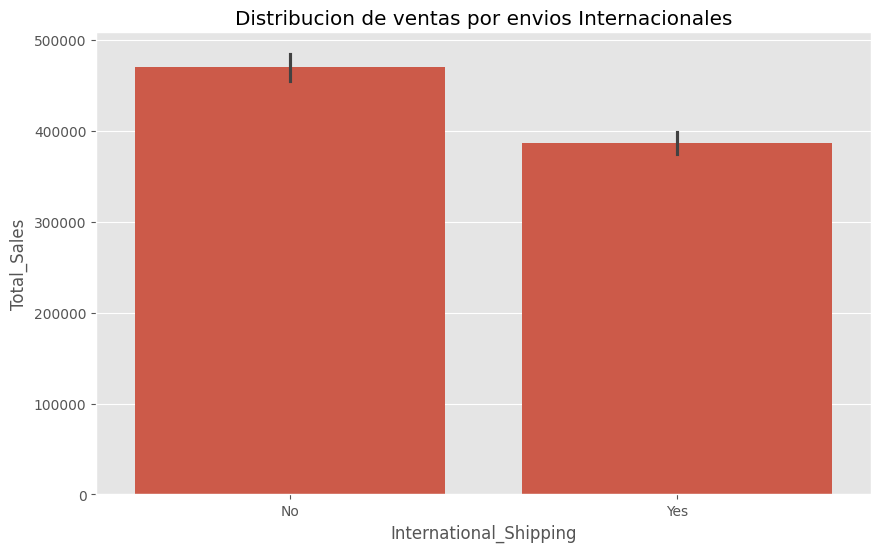

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='International_Shipping', y='Total_Sales', data=df, estimator=sum)
plt.title('Distribucion de ventas por envios Internacionales')
plt.show()

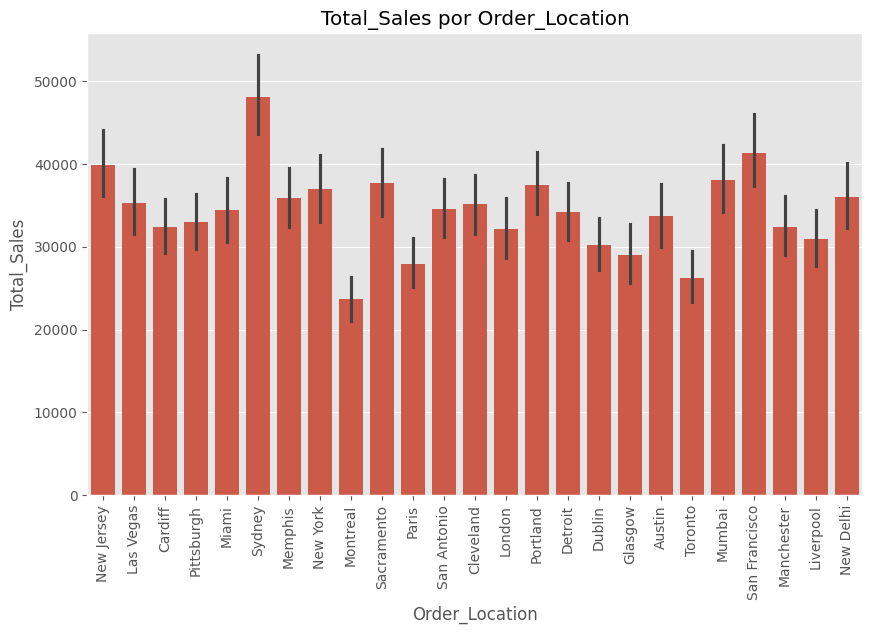

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Location', y='Total_Sales', data=df, estimator=sum)
plt.xticks(rotation=90)
plt.title('Total_Sales por Order_Location')
plt.show()

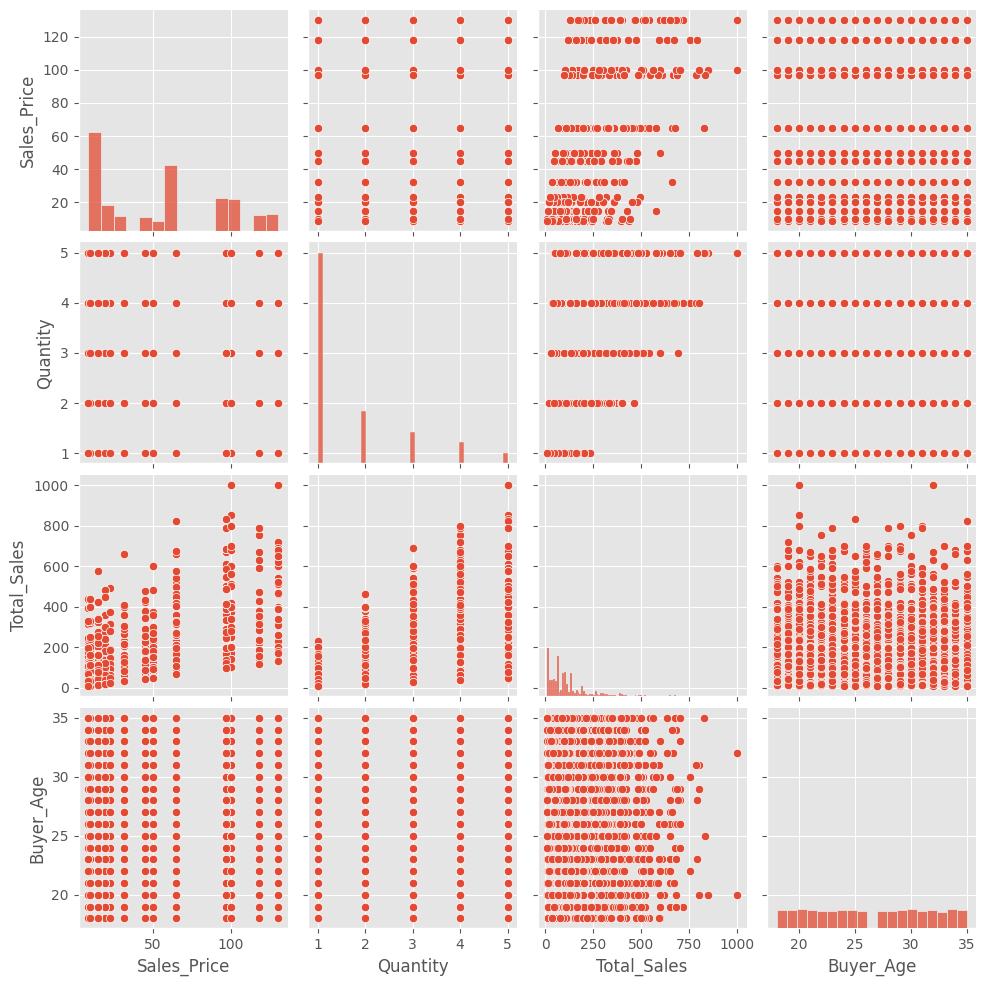

In [50]:
sns.pairplot(df[['Sales_Price', 'Quantity', 'Total_Sales', 'Buyer_Age']])
plt.show()


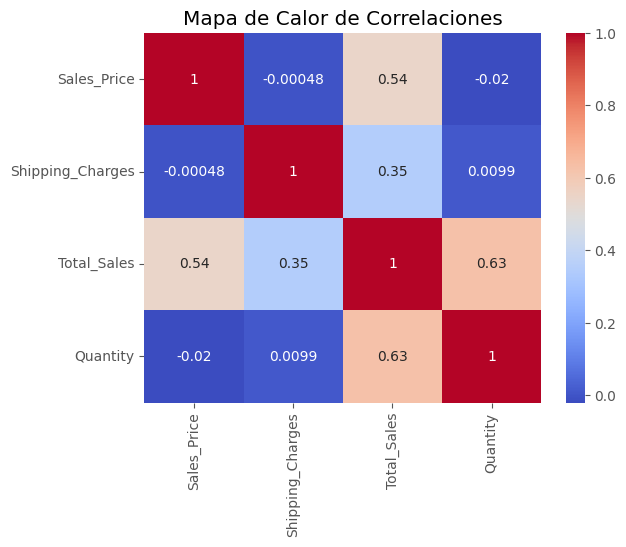

In [51]:
correlation_matrix = df[['Sales_Price', 'Shipping_Charges', 'Total_Sales', 'Quantity']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Mapa de Calor de Correlaciones")
plt.show()


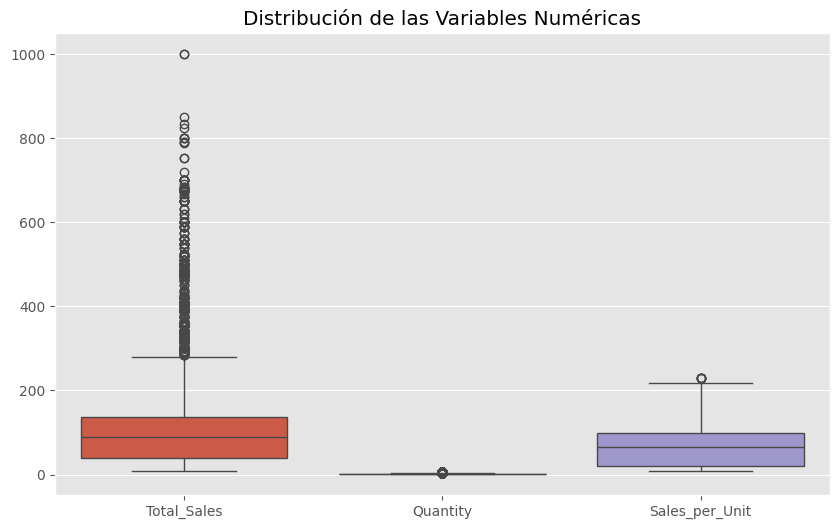

In [52]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[['Total_Sales', 'Quantity', 'Sales_per_Unit']])
plt.title('Distribución de las Variables Numéricas')
plt.show()

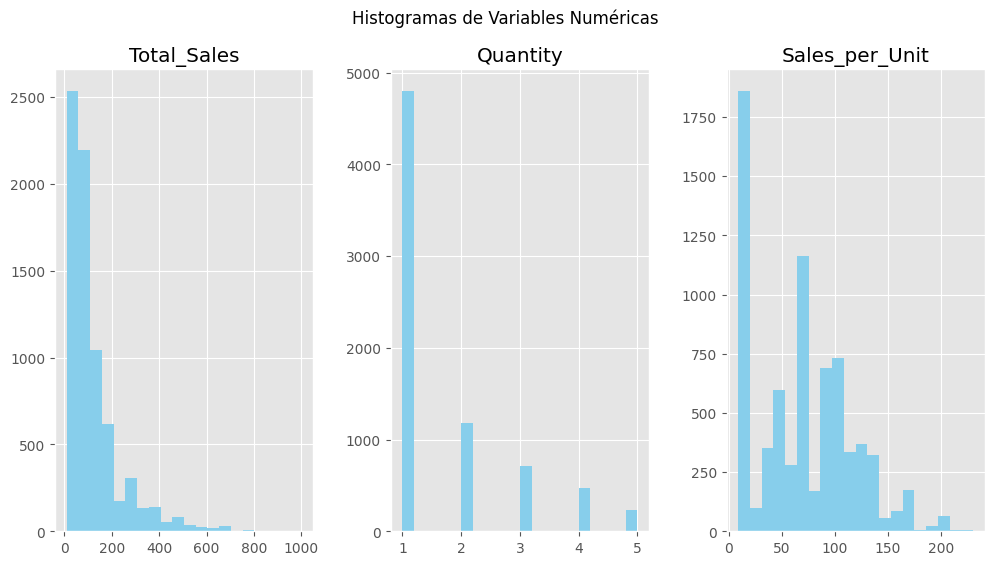

In [53]:
df[['Total_Sales', 'Quantity', 'Sales_per_Unit']].hist(bins=20, figsize=(12, 6), layout=(1, 3), color='skyblue')
plt.suptitle('Histogramas de Variables Numéricas')
plt.show()


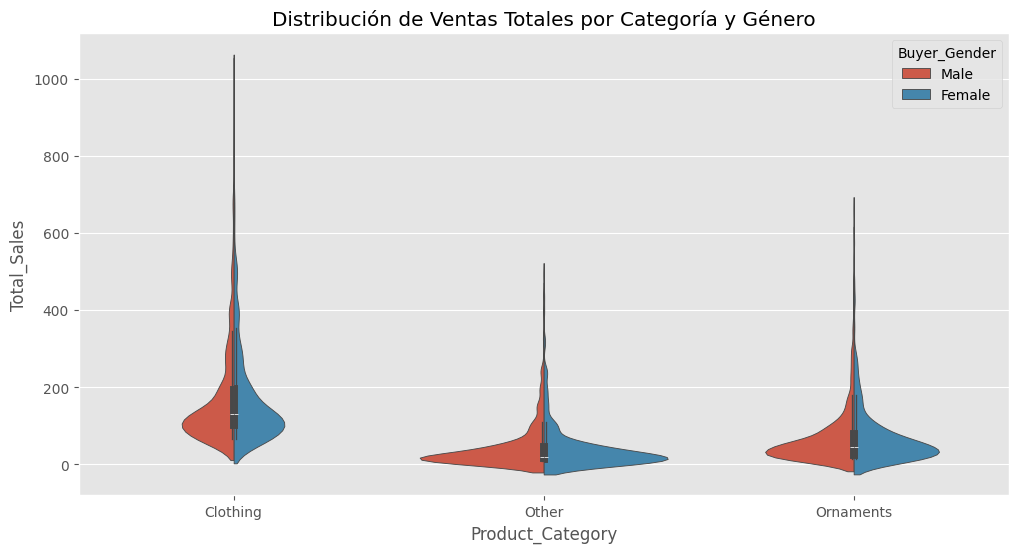

In [54]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='Product_Category', y='Total_Sales', data=df, hue='Buyer_Gender', split=True)
plt.title('Distribución de Ventas Totales por Categoría y Género')
plt.show()


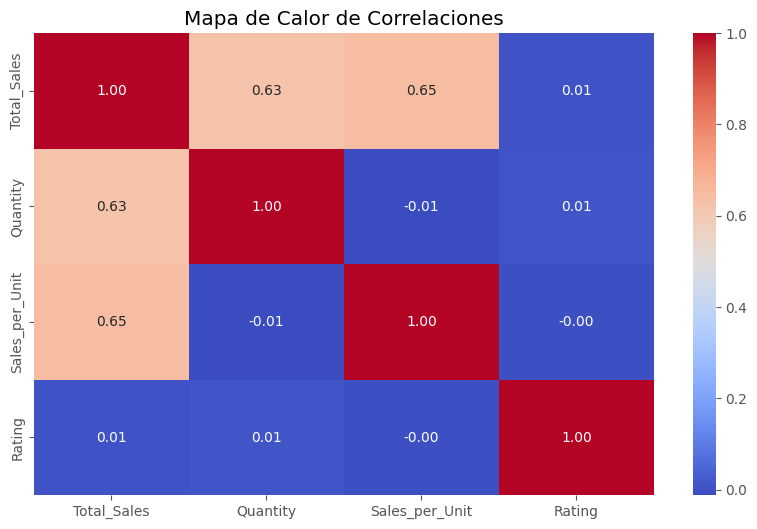

In [55]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[['Total_Sales', 'Quantity', 'Sales_per_Unit', 'Rating']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Mapa de Calor de Correlaciones')
plt.show()
